<a href="https://colab.research.google.com/github/SubbulakshmiSN/OrdinalLeastSquare-Stats-Model/blob/main/ExamScore_%26_GPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *`stats model- OLS(Ordinary Least Squares)`*

# *`IMPORT LIBRARIES`*

In [28]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
import statsmodels.api as sm

# *`READ DATA`*




In [2]:
df= pd.read_csv("/content/Exam Scores and GPA.csv")
df.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam    84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


# *`DATA OBSERVATION`*

In [ ]:
'''
suoervised learning
Target variable is GPA
since target is continuous and simple we use OLS(ordinary least square)
'''

In [4]:
df.describe()

,Exam,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
df.isnull().sum()

Exam    0
GPA     0
dtype: int64

In [6]:
df.corr()

,Exam,GPA
Exam,1.000000,0.637184
GPA,0.637184,1.000000


# *`STATISTICAL ANALYSIS`*

In [8]:
#central limit theorem
#Exam(continuous)
population = df.Exam.values
sample_mean = []
for i in range(15):
  sample = np.random.choice(population,20)
  sample_mean.append(sample.mean())
np.mean(sample_mean), population.mean()

(1845.7833333333333, 1845.2738095238096)

In [9]:
#central limit theorem
#GPA(continuous)
population = df.GPA.values
sample_mean = []
for i in range(15):
  sample = np.random.choice(population,20)
  sample_mean.append(sample.mean())
np.mean(sample_mean), population.mean()

(3.3325666666666662, 3.330238095238095)

In [14]:
#Hypothesis Testing
#2-Tailed Test
h0 = 0
ha = 0
for i in range(20):
  sample_1 = df.Exam.sample(frac = 0.05)
  sample_2 = df.GPA.sample(frac = 0.05)
  t_test, p_value = stats.ttest_ind(sample_1, sample_2)

  if p_value > 0.05:
    h0 += 1
  else:
    ha += 1

print(f"H0 accepted {h0} times, H0  rejected {ha} times")

if h0 > ha:
  print("\nHence H0 is rejected")
else:
  print("\nHence Ha is accepted")

H0 accepted 0 times, H0  rejected 20 times

Hence Ha is accepted


# *`DATA VISUALIZATION`*

<Axes: >

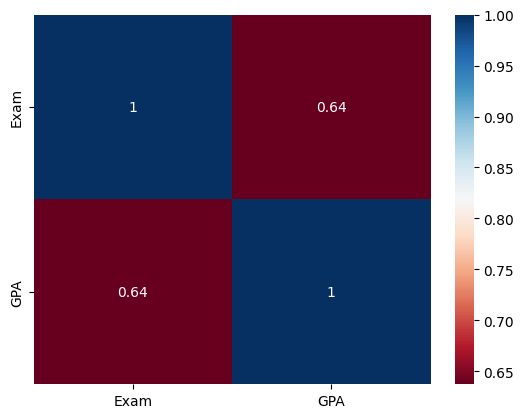

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

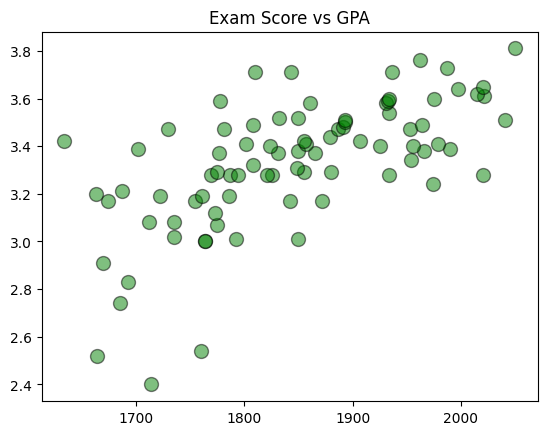

In [27]:
plt.scatter(df.Exam,df.GPA,
            marker = 'o',
            color = 'green',
            edgecolor = 'black',
            alpha = 0.5,
            s = 100)
plt.title('Exam Score vs GPA')
plt.show()

# *`MACHINE LEARNING`*

In [40]:
#seperate x and y
x = df.Exam
y = df.GPA
model = sm.add_constant(x)
result = sm.OLS(y,model).fit()
result.summary()
#y = B0 + B1x1 - equation of line

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        17:35:39   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
yhat = result.params[0] + result.params[1]* x
yhat

0     3.112890
1     3.030105
2     3.189051
3     3.064875
4     3.078120
        ...   
79    3.480452
80    3.271836
81    3.564892
82    3.523500
83    3.669201
Name: Exam, Length: 84, dtype: float64

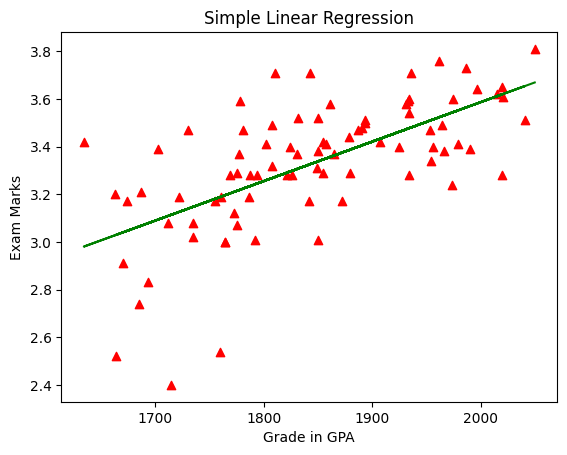

In [38]:
plt.scatter(x, y,
           marker = '^',
           color = 'red'
           )
plt.plot(x,yhat, color = 'green')
plt.title('Simple Linear Regression')
plt.xlabel('Grade in GPA')
plt.ylabel('Exam Marks')
plt.show()